#  Ejemplos de matplotlib 

In [ ]:
%matplotlib inline
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def calc_derivada(ypos, tiempo):
    return -2*ypos

vec_tiempo = np.linspace(0, 4, 40)
yvec = odeint(calc_derivada, 1, vec_tiempo) # integra un sistema de ODE's

plt.plot(vec_tiempo, yvec)
plt.xlabel('Tiempo [s]')
plt.ylabel('posición y [m]')

In [ ]:
import mpl_toolkits.mplot3d.axes3d as p3
from matplotlib.mlab import bivariate_normal
delta = 0.025
x = np.arange(-3.0, 3.0, delta)
y = np.arange(-2.0, 2.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = bivariate_normal(X, Y, 1.0, 1.0, 0.0, 0.0) #Distribución gaussiana bivariable
Z2 = bivariate_normal(X, Y, 1.5, 0.5, 1, 1)
# diferencia de Gaussianos
Z = 10.0 * (Z2 - Z1)
fig=plt.figure()
ax = p3.Axes3D(fig)
ax.contour3D(X,Y,Z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

In [ ]:
fig = plt.figure()
ax = p3.Axes3D(fig)
ax.contourf3D(X,Y,Z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
fig.add_axes(ax)
plt.show()

In [ ]:
# Ejemplo de gráfico interactivo

from numpy import pi, sin
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons

def signal(amp, freq):
    return amp * sin(2 * pi * freq * t)

axis_color = 'lightgoldenrodyellow'
fig = plt.figure()

# Draw the plot
ax = fig.add_subplot(111)
fig.subplots_adjust(left=0.25, bottom=0.25)
t = np.arange(0.0, 1.0, 0.001)
amp_0 = 5
freq_0 = 3
[line] = ax.plot(t, signal(amp_0, freq_0), linewidth=2, color='red')
ax.set_xlim([0, 1])
ax.set_ylim([-10, 10])

# Add two sliders for tweaking the parameters
amp_slider_ax  = fig.add_axes([0.25, 0.15, 0.65, 0.03], axisbg=axis_color)
amp_slider = Slider(amp_slider_ax, 'Amp', 0.1, 10.0, valinit=amp_0)
freq_slider_ax = fig.add_axes([0.25, 0.1, 0.65, 0.03], axisbg=axis_color)
freq_slider = Slider(freq_slider_ax, 'Freq', 0.1, 30.0, valinit=freq_0)
def sliders_on_changed(val):
    line.set_ydata(signal(amp_slider.val, freq_slider.val))
    fig.canvas.draw_idle()
amp_slider.on_changed(sliders_on_changed)
freq_slider.on_changed(sliders_on_changed)

# Add a button for resetting the parameters
reset_button_ax = fig.add_axes([0.8, 0.025, 0.1, 0.04])
reset_button = Button(reset_button_ax, 'Reset', color=axis_color, hovercolor='0.975')
def reset_button_on_clicked(mouse_event):
    freq_slider.reset()
    amp_slider.reset()
reset_button.on_clicked(reset_button_on_clicked)

# Add a set of radio buttons for changing color
color_radios_ax = fig.add_axes([0.025, 0.5, 0.15, 0.15], axisbg=axis_color)
color_radios = RadioButtons(color_radios_ax, ('red', 'blue', 'green'), active=0)
def color_radios_on_clicked(label):
    line.set_color(label)
    fig.canvas.draw_idle()
color_radios.on_clicked(color_radios_on_clicked)

plt.show()

In [ ]:
%matplotlib inline
from math import sqrt,sin,pi
from numpy import empty
from matplotlib.pyplot import imshow,gray,show
wavelength = 5.0
k = 2*pi/wavelength
xi0 = 1.0
separation = 20.0      # Separation of centers in cm
side = 100.0           # Side of the square in cm
points = 500           # Number of grid points along each side
spacing = side/points  # Spacing of points in cm
# Calculate the positions of the centers of the circles
x1 = side/2 + separation/2
y1 = side/2
x2 = side/2 - separation/2
y2 = side/2
# Make an array to store the heights
xi = empty([points,points],float)
# Calculate the values in the array
for i in range(points):
    y = spacing*i
    for j in range(points):
        x = spacing*j
        r1 = sqrt((x-x1)**2+(y-y1)**2)
        r2 = sqrt((x-x2)**2+(y-y2)**2)
        xi[i,j] = xi0*sin(k*r1) + xi0*sin(k*r2)
# Make the plot
imshow(xi,origin="lower",extent=[0,side,0,side])
show()

In [ ]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np


def f(t):
    s1 = np.cos(2*np.pi*t)
    e1 = np.exp(-t)
    return np.multiply(s1, e1)


################
# First subplot
################
t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)
t3 = np.arange(0.0, 2.0, 0.01)

# Twice as tall as it is wide.
fig = plt.figure(figsize=plt.figaspect(2.))
fig.suptitle('A tale of 2 subplots')
ax = fig.add_subplot(2, 1, 1)
l = ax.plot(t1, f(t1), 'bo',
            t2, f(t2), 'k--', markerfacecolor='green')
ax.grid(True)
ax.set_ylabel('Damped oscillation')


#################
# Second subplot
#################
ax = fig.add_subplot(2, 1, 2, projection='3d')
X = np.arange(-5, 5, 0.25)
xlen = len(X)
Y = np.arange(-5, 5, 0.25)
ylen = len(Y)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                       linewidth=0, antialiased=False)

ax.set_zlim3d(-1, 1)

plt.show()


In [20]:
%matplotlib inline
import numpy as np
import datetime as dt
from netCDF4 import Dataset  
import matplotlib.pyplot as plt

In [21]:
from netCDF4 import Dataset
d = Dataset("datos.nc", "r")

for nomb_var in d.variables.keys():
    variable = d.variables[nomb_var]
    print(nomb_var, variable.dtype, variable.dimensions, variable.shape)

longitude float32 ('longitude',) (144,)
latitude float32 ('latitude',) (73,)
time int32 ('time',) (62,)
tcw int16 ('time', 'latitude', 'longitude') (62, 73, 144)
tcwv int16 ('time', 'latitude', 'longitude') (62, 73, 144)
lsp int16 ('time', 'latitude', 'longitude') (62, 73, 144)
cp int16 ('time', 'latitude', 'longitude') (62, 73, 144)
msl int16 ('time', 'latitude', 'longitude') (62, 73, 144)
blh int16 ('time', 'latitude', 'longitude') (62, 73, 144)
tcc int16 ('time', 'latitude', 'longitude') (62, 73, 144)
p10u int16 ('time', 'latitude', 'longitude') (62, 73, 144)
p10v int16 ('time', 'latitude', 'longitude') (62, 73, 144)
p2t int16 ('time', 'latitude', 'longitude') (62, 73, 144)
p2d int16 ('time', 'latitude', 'longitude') (62, 73, 144)
e int16 ('time', 'latitude', 'longitude') (62, 73, 144)
lcc int16 ('time', 'latitude', 'longitude') (62, 73, 144)
mcc int16 ('time', 'latitude', 'longitude') (62, 73, 144)
hcc int16 ('time', 'latitude', 'longitude') (62, 73, 144)
tco3 int16 ('time', 'latit

In [ ]:
d.variables["tp"][:].shape


In [9]:
a = Dataset("prueba.nc", "w")

In [10]:
lat = a.createDimension("lat", 73)
lon = a.createDimension("lon", 144)

In [11]:
a.createVariable("latitud", np.float32, ('lat',))
a.createVariable("longitud", np.float32, ('lon',))

<class 'netCDF4._netCDF4.Variable'>
float32 longitud(lon)
unlimited dimensions: 
current shape = (144,)
filling on, default _FillValue of 9.969209968386869e+36 used

In [12]:
a.createVariable("prec", np.float64, ('lat', 'lon'))

<class 'netCDF4._netCDF4.Variable'>
float64 prec(lat, lon)
unlimited dimensions: 
current shape = (73, 144)
filling on, default _FillValue of 9.969209968386869e+36 used

In [13]:
a.variables["latitud"] = np.linspace(8,12,73)
a.variables["longitud"] = np.linspace(-86,-82,144)
a.variables["prec"] = np.random.uniform(size=(73,144)) 

print(a.variables["prec"])
a.close()

[[0.83528671 0.46778406 0.89194941 ... 0.0677197  0.33515848 0.56262551]
 [0.51521282 0.45117637 0.51228661 ... 0.46902807 0.73749249 0.83877751]
 [0.3041822  0.85033801 0.3676619  ... 0.09049099 0.51076845 0.55540871]
 ...
 [0.75332929 0.77388981 0.28627367 ... 0.21800193 0.63483866 0.83724282]
 [0.27400367 0.54947137 0.72818285 ... 0.18286187 0.18017545 0.76756369]
 [0.55484703 0.87602754 0.60731367 ... 0.23126345 0.67544655 0.95387304]]


In [14]:
a = Dataset("prueba.nc", "r")
for nomb_var in a.variables.keys():
    if nomb_var == "prec":
        print(a.variables[nomb_var][:])
    
    #print(nomb_var, variable.dtype, variable.dimensions, variable.shape)

[[-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 ...
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]]


/usr/local/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1707: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


NameError: name 'addcyclic' is not defined

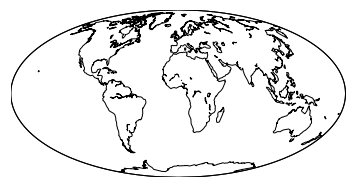

In [17]:
from mpl_toolkits.basemap import Basemap

nc = Dataset("prueba.nc", "r")
lats = nc.variables['latitud'][:]
lons = nc.variables['longitud'][:]
prec = nc.variables['prec'][:]
print(prec)
mapa = Basemap(projection='stere', llcrnrlat=lats[0], urcrnrlat=lats[-1],\
            llcrnrlon=lons[0], urcrnrlon=lons[-1], resolution='i', lon_0=lons[0], lat_0=lats[0])

mapa.drawmapboundary(fill_color='aqua')
mapa.fillcontinents(color='coral',lake_color='aqua')
mapa.drawcoastlines()
mapa.drawcountries()

lon2d, lat2d = np.meshgrid(lons, lats)
x, y = mapa(lon2d, lat2d)

cs = mapa.pcolormesh(x, y, prec)
nc.close()

In [ ]:
print(prec)

In [ ]:
nc.close()

In [ ]:
a.close()

In [19]:
nc = Dataset("datos.nc", "r")
for nomb_var in nc.variables.keys():
    variable = nc.variables[nomb_var]
    print(nomb_var, variable.dtype, variable.dimensions, variable.shape)

longitude float32 ('longitude',) (144,)
latitude float32 ('latitude',) (73,)
time int32 ('time',) (62,)
tcw int16 ('time', 'latitude', 'longitude') (62, 73, 144)
tcwv int16 ('time', 'latitude', 'longitude') (62, 73, 144)
lsp int16 ('time', 'latitude', 'longitude') (62, 73, 144)
cp int16 ('time', 'latitude', 'longitude') (62, 73, 144)
msl int16 ('time', 'latitude', 'longitude') (62, 73, 144)
blh int16 ('time', 'latitude', 'longitude') (62, 73, 144)
tcc int16 ('time', 'latitude', 'longitude') (62, 73, 144)
p10u int16 ('time', 'latitude', 'longitude') (62, 73, 144)
p10v int16 ('time', 'latitude', 'longitude') (62, 73, 144)
p2t int16 ('time', 'latitude', 'longitude') (62, 73, 144)
p2d int16 ('time', 'latitude', 'longitude') (62, 73, 144)
e int16 ('time', 'latitude', 'longitude') (62, 73, 144)
lcc int16 ('time', 'latitude', 'longitude') (62, 73, 144)
mcc int16 ('time', 'latitude', 'longitude') (62, 73, 144)
hcc int16 ('time', 'latitude', 'longitude') (62, 73, 144)
tco3 int16 ('time', 'latit